# REDUCCIÓN DE DIMENSIONALIDAD - ANÁLISIS DE SUELOS

Es transformar los datos de un espacio de muchas dimensiones a uno de menor numero de dimensiones.

1. Reducir complejidad 
2. Remover redundancia de los daots
3. Identificar los factores mas relevantes (ruido)
4. Reducir el tiempo computacional para procesos siguientes
5. Facilitar clustering de manera que no se introduzcan muchas dimensiones
6. Visualizacion de datos


#1) PCA

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con  n  individuos cada uno con  p  variables ( $X_1 , X_2 , ...,  X_p$), es decir, el espacio muestral tiene  p  dimensiones. PCA permite encontrar un numero de factores subyacentes  ($z<p$) que explican aproximadamente lo mismo que las  p  variables originales. Donde antes se necesitaban  p  valores para caracterizar a cada individuo, ahora bastan z  valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.

Dos de las principales aplicaciones del PCA son la visualizacion y el preprocesado de predictores previo ajuste de modelos supervisados.

La libreria scikitlearn contiene la clase ```sklearn.decomposition.PCA``` que implementa la mayoria de las funcionalidades necesarias para crear y utilizar modelos PCA. Para visualizaciones, ```Yellowbrick``` ofrece funcionalidades extra.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import plotly as py
import plotly.graph_objs as go


# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Los siguientes datos corresponden a 139 muestras de suelo y sus respectivos resultados por variable (elementos nutricionales del suelo). Las muestras fueron recolectadas en diferentes fincas en la localidad de Sumapaz, Bogotá, donde campesinos cultivan la tierra y producen alimentos. 

###OBJETIVOS

- Realizar una agrupación de las muestras obtenidas, identificando los valores más relevantes y reducir la complejidad debido al número de variables.
- Facilitar la comprensión de los datos para que un ingeniero agrónomo pueda realizar un plan de fertilización por grupos y no para cada finca individualmente.



In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/Bootcamp Mujeres Digitales/Proyecto final'

/content/gdrive/MyDrive/Bootcamp Mujeres Digitales/Proyecto final


In [ ]:
dataSoilsAll = pd.read_excel('dataSuelos.xlsx')

In [ ]:
dataSoilsAll.head(n=10)

,Usuario,Vereda,Finca/Predio,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
0,Norberto Vega,Rios,3 caminos,5.09,0.76,13.40,131.0,30.80,8.26,2.34,0.90,0.45,12.80,608.00,42.70,3.37,0.306,3.529915,2.600000,9.177778,11.777778
1,Maria Palacios,Rios,Arrayanas,4.43,1.24,7.12,153.0,32.10,5.96,1.31,0.73,0.39,9.29,1150.00,27.10,4.58,0.370,4.549618,1.794521,8.164384,9.958904
2,Lucan Morales,Rios,Agualinda,5.50,4.41,16.20,94.7,16.90,8.96,3.50,1.17,0.37,14.20,17.90,12.30,0.89,0.430,2.560000,2.991453,7.658120,10.649573
3,Ana Rozo,Rios,Los Guayabos,5.25,0.42,14.70,51.8,7.68,5.44,1.33,0.59,0.34,9.26,26.70,14.50,0.77,0.306,4.090226,2.254237,9.220339,11.474576
4,Carlos Diaz,Animas,El Recreo,4.90,0.58,12.80,20.1,8.07,3.04,0.70,0.54,0.30,6.21,20.70,3.20,2.70,0.230,4.342857,1.296296,5.629630,6.925926
5,Anatilde Molina,Animas,Los Eucaliptos,6.70,1.70,14.00,118.0,21.10,19.10,3.95,1.70,0.42,25.20,62.50,86.40,1.36,1.020,4.835443,2.323529,11.235294,13.558824
6,Dago Villalobos,Santa Rosa,El Rocio,5.84,0.49,11.10,800.0,8.07,12.70,2.34,1.17,0.34,16.60,65.60,60.70,5.43,0.350,5.427350,2.000000,10.854701,12.854701
7,Floriberto Rey,Betania,Buenos Aires,6.19,0.58,14.40,57.7,6.60,13.30,3.08,0.83,0.42,17.40,13.40,30.80,4.15,0.430,4.318182,3.710843,16.024096,19.734940
8,Jorge Porras,Tabaco,El Rubi,5.99,0.44,16.10,15.4,9.57,11.20,2.10,0.79,0.33,14.40,5.93,13.50,0.29,0.280,5.333333,2.658228,14.177215,16.835443
9,Clara Morales,Nazareth,San Jose,4.79,0.28,9.05,76.1,7.92,3.11,0.66,0.42,0.46,10.80,2.59,6.22,1.74,0.250,4.712121,1.571429,7.404762,8.976190


In [ ]:
dataSoilsAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Usuario                                    158 non-null    object 
 1   Vereda                                     157 non-null    object 
 2   Finca/Predio                               158 non-null    object 
 3   Ph                                         158 non-null    float64
 4   Conductividad electrica (ds/m)             158 non-null    float64
 5   Materia Organica (g/100g)                  158 non-null    float64
 6   Fosforo disponible (mg/g)                  158 non-null    float64
 7   Azufre disponible (mg/kg)                  158 non-null    float64
 8   Calcio Intercambiable (Cmol/Kg)            158 non-null    float64
 9   Magnesio Irtercambiable (Cmol/kg)          158 non-null    float64
 10  Potasio Intercambiable (Cm

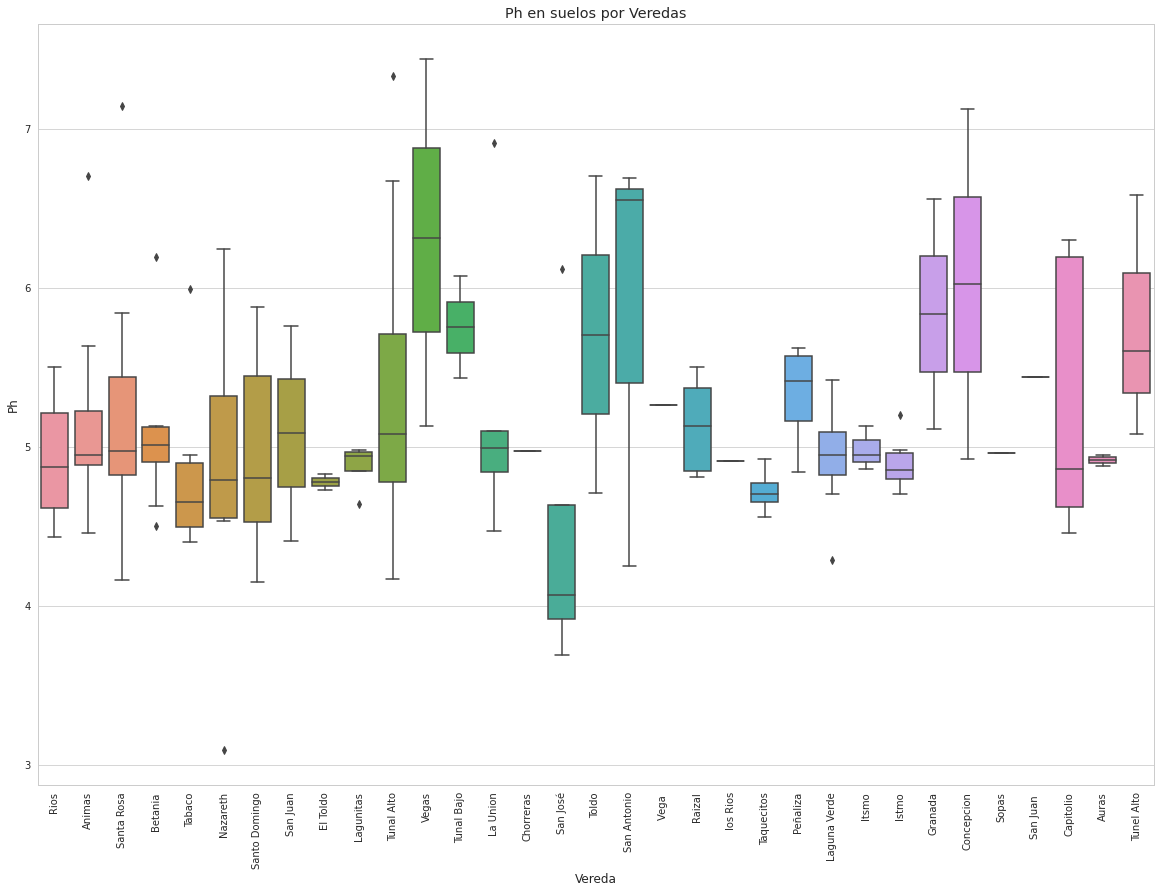

In [ ]:
plt.figure(figsize=(20, 14))
sb.boxplot(x='Vereda', y='Ph',data=dataSoilsAll)
plt.xticks(rotation=90)
plt.title('Ph en suelos por Veredas')
plt.show()


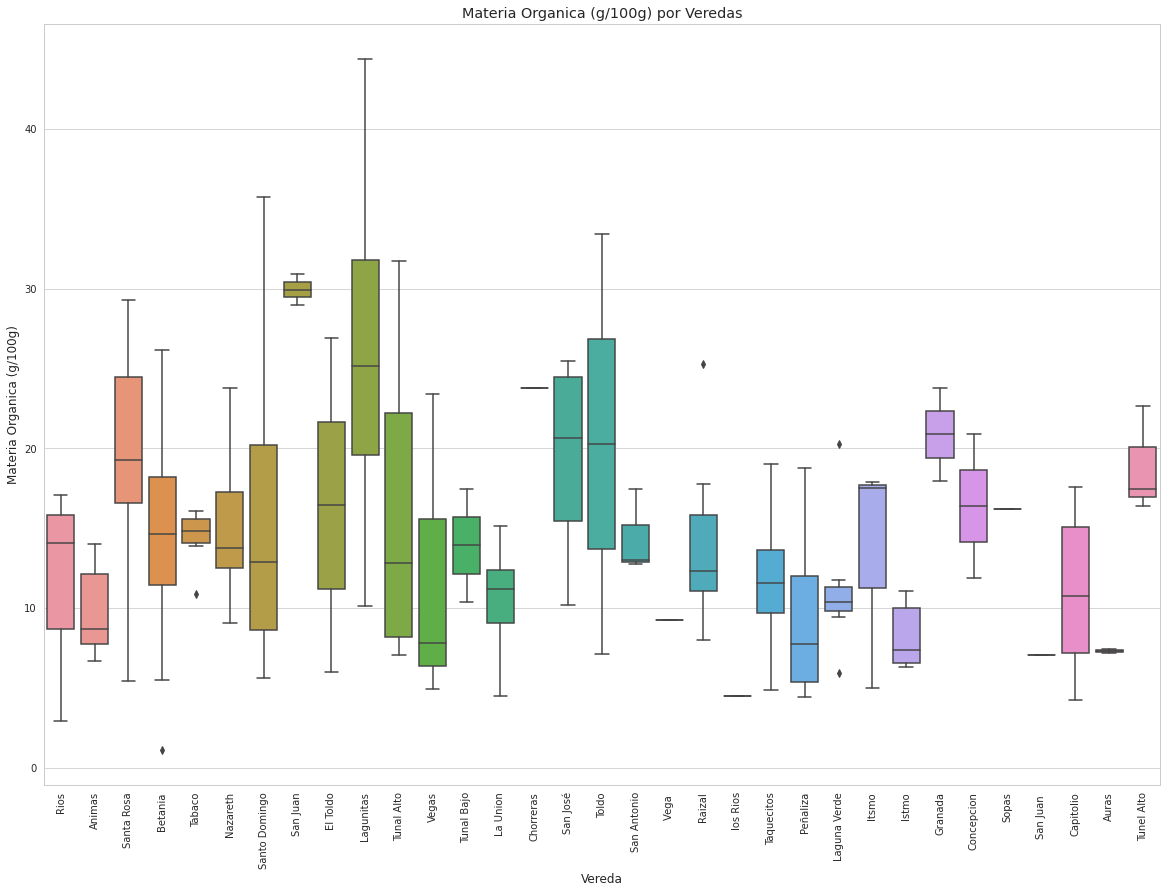

In [ ]:
plt.figure(figsize=(20, 14))
sb.boxplot(x='Vereda', y='Materia Organica (g/100g)',data=dataSoilsAll)
plt.xticks(rotation=90)
plt.title('Materia Organica (g/100g) por Veredas')
plt.show()

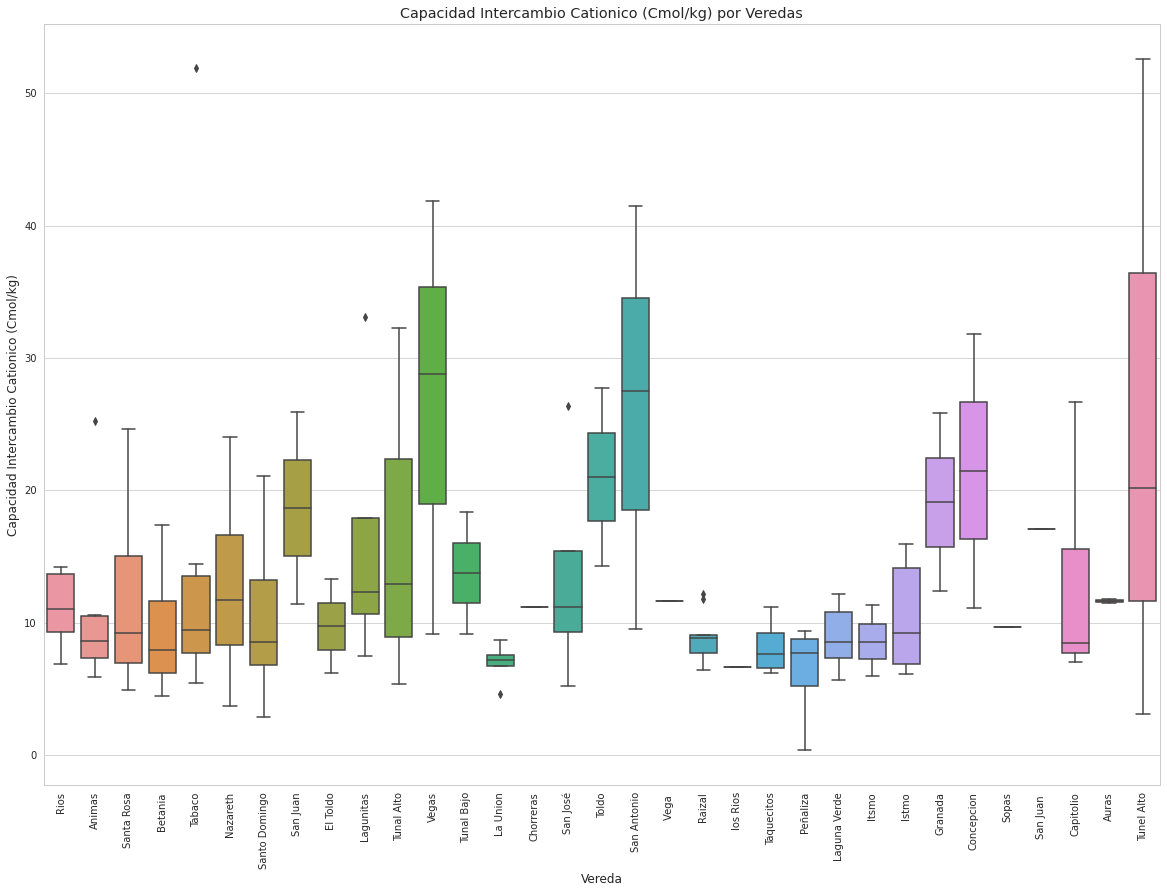

In [ ]:
plt.figure(figsize=(20, 14))
sb.boxplot(x='Vereda', y='Capacidad Intercambio Cationico (Cmol/kg)',data=dataSoilsAll)
plt.xticks(rotation=90)
plt.title('Capacidad Intercambio Cationico (Cmol/kg) por Veredas')
plt.show()

En las anteriores gráficas se puede observar la alta variabilidad en los datos en caso de que se realizara una agrupación por veredas. A pesar de que las fincas  correspondientes a una misma vereda se pueden encontrar cerca, los datos muestran los suelos pueden presentar muchas diferencias.

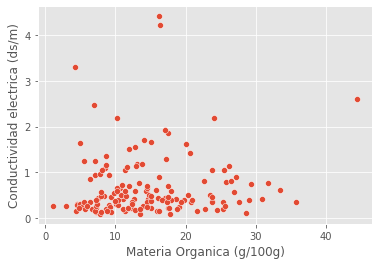

In [ ]:
sb.scatterplot(x = 'Materia Organica (g/100g)', y = 'Conductividad electrica (ds/m)', data = dataSoilsAll)

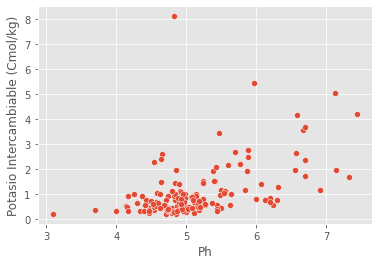

In [ ]:
sb.scatterplot(x = 'Ph', y = 'Potasio Intercambiable (Cmol/kg)', data = dataSoilsAll)

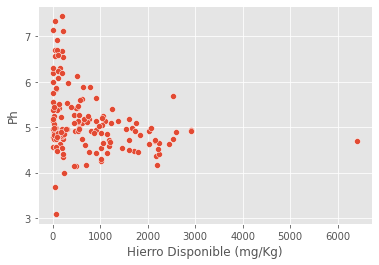

In [ ]:
sb.scatterplot(x = 'Hierro Disponible (mg/Kg)', y = 'Ph', data = dataSoilsAll)

In [ ]:
dataSoils = dataSoilsAll.drop(axis=1, columns=['Usuario','Vereda','Finca/Predio'])

En los anteriores gráficos de dispersión se pretende observar la correlación "esperada" entre algunas variables del suelo, sin embargo, no siempre se cumple la relación, como por ejemplo en la última gráfica, donde se esperaría una correlación negativa (a mayor contenido de hierro, menor es el ph), sin embargo esto representa la influencia que tienen las otras variables que también afectan el el ph del suelo.

In [ ]:
dataSoils.head()

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
0,5.09,0.76,13.40,131.0,30.80,8.26,2.34,0.90,0.45,12.80,608.0,42.7,3.37,0.306,3.529915,2.600000,9.177778,11.777778
1,4.43,1.24,7.12,153.0,32.10,5.96,1.31,0.73,0.39,9.29,1150.0,27.1,4.58,0.370,4.549618,1.794521,8.164384,9.958904
2,5.50,4.41,16.20,94.7,16.90,8.96,3.50,1.17,0.37,14.20,17.9,12.3,0.89,0.430,2.560000,2.991453,7.658120,10.649573
3,5.25,0.42,14.70,51.8,7.68,5.44,1.33,0.59,0.34,9.26,26.7,14.5,0.77,0.306,4.090226,2.254237,9.220339,11.474576
4,4.90,0.58,12.80,20.1,8.07,3.04,0.70,0.54,0.30,6.21,20.7,3.2,2.70,0.230,4.342857,1.296296,5.629630,6.925926


In [ ]:
dataSoils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Ph                                         158 non-null    float64
 1   Conductividad electrica (ds/m)             158 non-null    float64
 2   Materia Organica (g/100g)                  158 non-null    float64
 3   Fosforo disponible (mg/g)                  158 non-null    float64
 4   Azufre disponible (mg/kg)                  158 non-null    float64
 5   Calcio Intercambiable (Cmol/Kg)            158 non-null    float64
 6   Magnesio Irtercambiable (Cmol/kg)          158 non-null    float64
 7   Potasio Intercambiable (Cmol/kg)           158 non-null    float64
 8   Sodio Intercambiable (Cmol/Kg              158 non-null    float64
 9   Capacidad Intercambio Cationico (Cmol/kg)  158 non-null    float64
 10  Hierro Disponible (mg/Kg) 

####A continuación se generan los datos correspondientes a estadística descriptiva:

In [ ]:
dataSoils.describe()

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.132278,0.657975,14.433228,99.190127,13.001772,6.736139,5.260146,1.056443,0.604759,12.509494,710.722911,15.412722,3.559810,0.387924,3.979574,3.576476,7.459212,11.035687
std,0.708549,0.681242,7.478419,144.926979,13.674304,6.979913,44.841874,1.073118,4.597006,8.670331,873.044343,26.647377,11.132257,0.340600,1.655541,20.356795,5.989126,21.547226
min,3.090000,0.090000,1.080000,3.160000,2.720000,0.650000,0.270000,0.200000,0.140000,0.340000,2.590000,0.960000,0.100000,0.026000,0.031504,0.231813,0.136868,0.368681
25%,4.722500,0.260000,8.647500,19.325000,6.787500,2.410000,0.637500,0.460000,0.140000,7.135000,77.600000,4.197500,1.000000,0.230000,3.036378,1.036724,3.586339,4.747526
50%,4.960000,0.420000,12.810000,45.650000,9.490000,4.015000,1.085000,0.714000,0.218500,10.305000,441.570000,7.325000,1.620000,0.306000,3.657838,1.539925,6.066466,7.594643
75%,5.417500,0.785000,17.952500,100.405000,13.575000,8.010000,2.180000,1.100000,0.290000,13.950000,1044.452500,16.000000,3.430000,0.437500,4.696078,2.229213,8.902182,11.367079
max,7.440000,4.410000,44.420000,800.000000,121.220000,42.640000,565.000000,8.110000,58.000000,52.620000,6410.680000,232.430000,137.620000,3.230000,10.111524,256.818182,38.055556,264.909091


In [ ]:
print('--------------------------------------------------------')
print('--------------------Media/Variable----------------------')
print('--------------------------------------------------------')
dataSoils.mean(axis=0)

--------------------------------------------------------
--------------------Media/Variable----------------------
--------------------------------------------------------


Ph                                             5.132278
Conductividad electrica (ds/m)                 0.657975
Materia Organica (g/100g)                     14.433228
Fosforo disponible (mg/g)                     99.190127
Azufre disponible (mg/kg)                     13.001772
Calcio Intercambiable (Cmol/Kg)                6.736139
Magnesio Irtercambiable (Cmol/kg)              5.260146
Potasio Intercambiable (Cmol/kg)               1.056443
Sodio Intercambiable (Cmol/Kg                  0.604759
Capacidad Intercambio Cationico (Cmol/kg)     12.509494
Hierro Disponible (mg/Kg)                    710.722911
Zinc Disponible (mg/Kg)                       15.412722
Cobre Dispoble (mg/Kg)                         3.559810
Boro disponible (mg/kg)                        0.387924
Ca/Mg                                          3.979574
Mg/K                                           3.576476
Ca/K                                           7.459212
(Ca+Mg)/K                                     11

In [ ]:
print('--------------------------------------------------------')
print('-----------------Varianza/Variable----------------------')
print('--------------------------------------------------------')
dataSoils.var(axis=0)

--------------------------------------------------------
-----------------Varianza/Variable----------------------
--------------------------------------------------------


Ph                                                0.502042
Conductividad electrica (ds/m)                    0.464090
Materia Organica (g/100g)                        55.926753
Fosforo disponible (mg/g)                     21003.829232
Azufre disponible (mg/kg)                       186.986578
Calcio Intercambiable (Cmol/Kg)                  48.719179
Magnesio Irtercambiable (Cmol/kg)              2010.793656
Potasio Intercambiable (Cmol/kg)                  1.151583
Sodio Intercambiable (Cmol/Kg                    21.132464
Capacidad Intercambio Cationico (Cmol/kg)        75.174634
Hierro Disponible (mg/Kg)                    762206.424621
Zinc Disponible (mg/Kg)                         710.082718
Cobre Dispoble (mg/Kg)                          123.927141
Boro disponible (mg/kg)                           0.116009
Ca/Mg                                             2.740817
Mg/K                                            414.399106
Ca/K                                             35.8696

#Reducción de dimensionalidad

Debido a la cantidad de variables a analizar, se realizará una reduccción de dimensionalidad con el objetivo de estimar el numero de grupos que se puede generar para facilitar la realización de los planes de fertilización de manera grupal. 

Para analizar los datos es necesaria la estandarización de variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA.

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. El StandardScaler le resta a cada registro le quita la media de su columna y lo divide por la desviación estandar, dando como resultado datos entre -2 y 2.

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataSoils)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pca_pipe.fit(dataSoils)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

Extracción de loadings de modelo_pca, para identificar qué variables son más importantes que otras.

components_ contiene el valor de los loadings ϕ que definen cada componente (eigenvector). Las filas se corresponden con las componentes principales (ordenadas de mayor a menor varianza explicada). Las filas se corresponden las variables de entrada.

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataSoils.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
)

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
PC1,3.094521e-01,2.074611e-01,4.888810e-02,2.352513e-01,2.738218e-01,3.886927e-01,2.377222e-01,2.600917e-01,7.818119e-02,3.517532e-01,-1.271108e-01,2.648689e-01,-2.492204e-02,2.580639e-01,1.218206e-01,0.231637,0.173402,0.267037
PC2,-2.185585e-01,-1.804002e-01,1.505199e-01,-1.082271e-01,-8.128600e-02,-2.154349e-01,4.733851e-01,-1.677504e-01,-3.513628e-02,-1.877829e-01,4.622078e-02,2.055845e-01,-4.726335e-03,1.395986e-02,-2.750275e-01,0.480703,-0.090307,0.429044
PC3,-1.866476e-01,3.910606e-01,2.793340e-01,-9.023080e-02,2.954379e-01,-7.875089e-02,-2.473741e-02,3.773934e-01,-1.243925e-01,2.624241e-02,1.742259e-01,8.552742e-02,-1.386750e-03,1.338993e-01,-3.365848e-01,-0.050332,-0.515322,-0.190787
PC4,-1.594198e-01,1.842801e-01,-2.605498e-01,2.134462e-01,2.112509e-01,-4.490480e-02,5.134119e-02,-3.796574e-02,-2.897332e-01,-8.511520e-02,4.587524e-01,1.391755e-01,5.459517e-01,-2.371560e-01,2.969309e-01,0.053077,0.072268,0.070232
PC5,-3.011261e-01,2.788101e-01,4.706580e-01,-2.913413e-01,3.136373e-01,-1.119764e-02,-1.114517e-01,-3.853574e-01,7.187964e-02,-3.809479e-02,-1.541064e-01,2.146497e-01,-6.793871e-02,-3.845083e-02,2.622902e-01,-0.096340,0.324284,-0.000882
PC6,-2.214980e-03,-2.080862e-01,3.897291e-01,1.879115e-01,-2.140035e-01,8.697576e-03,-6.792216e-02,-7.988740e-03,6.038917e-01,3.601167e-02,2.341299e-01,1.367869e-01,4.717846e-01,1.964934e-01,1.307665e-02,-0.075658,-0.065594,-0.089710
PC7,-1.265387e-01,2.627820e-01,-3.467267e-01,-6.064540e-02,1.723414e-01,1.324996e-02,4.773302e-02,2.989921e-02,6.709229e-01,3.275047e-02,2.148373e-01,-7.568783e-02,-2.328631e-01,-3.933979e-01,-1.797314e-01,0.059877,0.066281,0.074992
PC8,-1.371907e-01,6.995609e-02,7.753725e-02,6.496975e-01,-1.787303e-02,-1.759036e-01,3.375735e-02,2.161115e-02,8.757902e-02,-2.032879e-01,-4.303473e-01,1.811237e-01,-1.640843e-01,-2.889736e-01,2.279847e-01,0.012804,-0.284995,-0.067119
PC9,5.181173e-02,9.822463e-02,-3.379670e-02,-2.046449e-01,7.469504e-02,3.245159e-02,3.874332e-02,3.980298e-02,4.624927e-02,1.065698e-01,-5.982911e-01,-1.850773e-01,6.139025e-01,-2.929025e-01,-2.497472e-01,0.045083,-0.031824,0.033747
PC10,2.515523e-02,3.421412e-02,-1.463234e-01,-1.439813e-02,3.718041e-01,-1.376801e-01,1.196186e-01,-1.117111e-01,2.027204e-01,-3.151245e-01,-9.223392e-02,-5.048886e-01,7.415116e-02,4.845729e-01,3.081159e-01,0.109914,-0.197637,0.048907


# Reconstruccion de los ejes
La primera componente tiene la siguiente combinacion lineal de variables

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

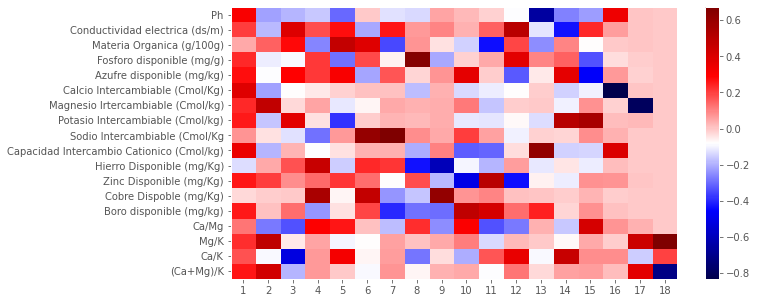

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(dataSoils.columns)), dataSoils.columns)
plt.xticks(range(len(dataSoils.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [ ]:
modelo_pca.n_components_

18

In [ ]:
np.arange(len(dataSoils.columns)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
modelo_pca.explained_variance_ratio_

array([2.74430770e-01, 1.64739216e-01, 9.88070398e-02, 7.20197236e-02,
       6.91062830e-02, 6.02976169e-02, 4.79013763e-02, 4.71747771e-02,
       4.20350645e-02, 3.29704661e-02, 2.87484691e-02, 1.96332287e-02,
       1.42229530e-02, 1.33980010e-02, 1.05331848e-02, 3.89463046e-03,
       8.71994440e-05, 1.98382544e-33])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.74430770e-01 1.64739216e-01 9.88070398e-02 7.20197236e-02
 6.91062830e-02 6.02976169e-02 4.79013763e-02 4.71747771e-02
 4.20350645e-02 3.29704661e-02 2.87484691e-02 1.96332287e-02
 1.42229530e-02 1.33980010e-02 1.05331848e-02 3.89463046e-03
 8.71994440e-05 1.98382544e-33]


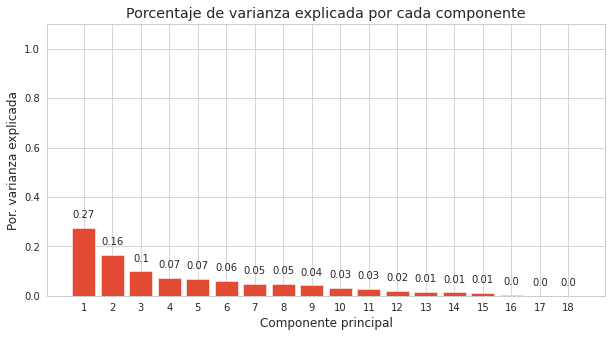

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataSoils.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, el primer componente explica el 27% de la varianza observada en los datos y la segunda el 16% y así sucesivamente. Se tomarán los tres primeros componentes que suman el 53% de la varianza observada en los datos. Los últimos componentes no reunen tanta varianza en los datos.

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.27443077, 0.43916999, 0.53797703, 0.60999675, 0.67910303,
       0.73940065, 0.78730203, 0.8344768 , 0.87651187, 0.90948233,
       0.9382308 , 0.95786403, 0.97208698, 0.98548499, 0.99601817,
       0.9999128 , 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27443077 0.43916999 0.53797703 0.60999675 0.67910303 0.73940065
 0.78730203 0.8344768  0.87651187 0.90948233 0.9382308  0.95786403
 0.97208698 0.98548499 0.99601817 0.9999128  1.         1.        ]


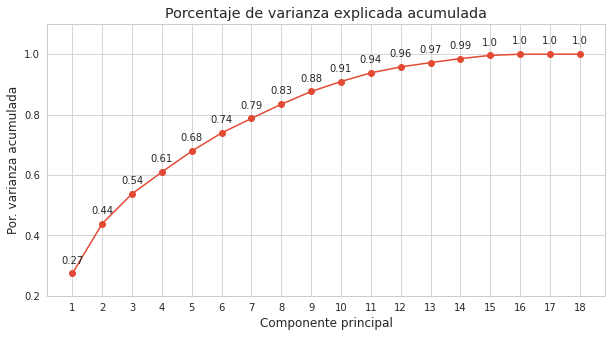

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(dataSoils.columns))+ 1 ,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataSoils.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.2, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Debido a la cantidad de variables, es más complejo que los dos primeros componentes recojan un alto porcentaje de la varianza explicada acumulada.

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataSoils)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
    index   = dataSoils.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.696003,0.019530,0.305570,0.471939,0.673151,-0.299378,0.344199,0.236311,0.068141,-0.303259,0.660230,-0.595090,-0.088756,0.431351,-0.750862,-0.014510,-0.020592,-6.990968e-16
1,0.080300,-0.190956,0.474134,1.463309,0.696932,-0.603296,0.862829,0.328887,-0.373998,0.593707,0.788020,-0.176719,0.476315,0.237754,-0.268006,-0.181832,-0.025819,-7.001198e-16
2,1.594866,-1.080992,2.389804,0.106932,1.439842,-1.446036,1.331437,0.328926,1.146791,0.040767,1.034818,2.902988,-0.865832,-2.209980,0.743271,0.273727,0.009974,1.410313e-15
3,-0.462453,0.130496,-0.741333,-0.589999,0.291769,-0.302306,-0.251417,0.213008,0.305989,-0.072389,0.151050,-0.097596,-0.262172,-0.041071,0.097413,0.030212,0.003453,5.752307e-18
4,-1.224590,0.128346,-0.364555,-0.322580,0.252273,-0.474284,-0.052052,0.446786,0.534327,0.405094,0.026049,-0.170770,-0.104516,-0.239056,0.348041,-0.051910,0.001732,-1.636302e-17


In [ ]:
proyecciones = np.dot(modelo_pca.components_, scale(dataSoils).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
proyecciones = proyecciones.transpose().set_index(dataSoils.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.696003,0.019530,0.305570,0.471939,0.673151,-0.299378,0.344199,0.236311,0.068141,-0.303259,0.660230,-0.595090,-0.088756,0.431351,-0.750862,-0.014510,-0.020592,-6.674379e-16
1,0.080300,-0.190956,0.474134,1.463309,0.696932,-0.603296,0.862829,0.328887,-0.373998,0.593707,0.788020,-0.176719,0.476315,0.237754,-0.268006,-0.181832,-0.025819,-6.823388e-16
2,1.594866,-1.080992,2.389804,0.106932,1.439842,-1.446036,1.331437,0.328926,1.146791,0.040767,1.034818,2.902988,-0.865832,-2.209980,0.743271,0.273727,0.009974,1.435033e-15
3,-0.462453,0.130496,-0.741333,-0.589999,0.291769,-0.302306,-0.251417,0.213008,0.305989,-0.072389,0.151050,-0.097596,-0.262172,-0.041071,0.097413,0.030212,0.003453,3.047225e-17
4,-1.224590,0.128346,-0.364555,-0.322580,0.252273,-0.474284,-0.052052,0.446786,0.534327,0.405094,0.026049,-0.170770,-0.104516,-0.239056,0.348041,-0.051910,0.001732,3.412934e-18


        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC2')

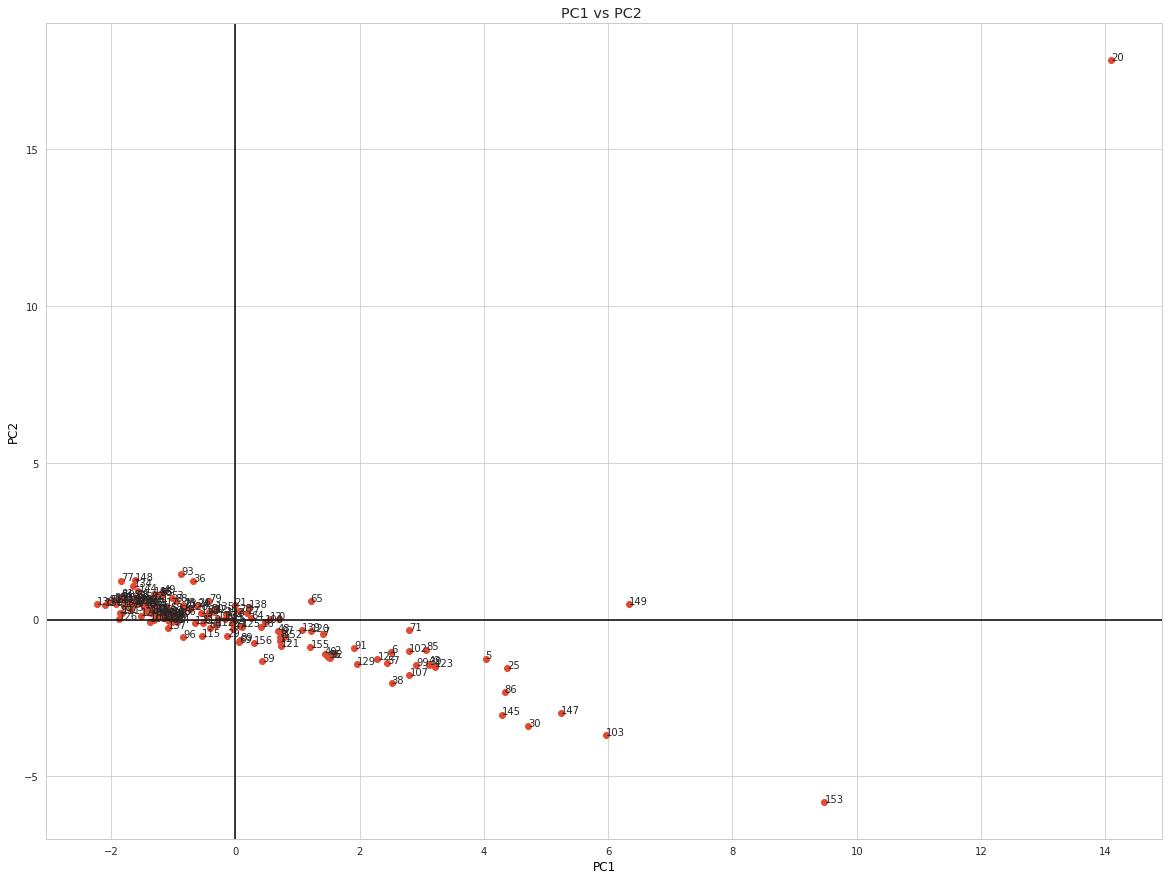

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones['val']=proyecciones.index
print(proyecciones.head())


ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 ')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

Baja observación de posibles grupos en componente 1 y 2 por valores atípicos.

        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC3')

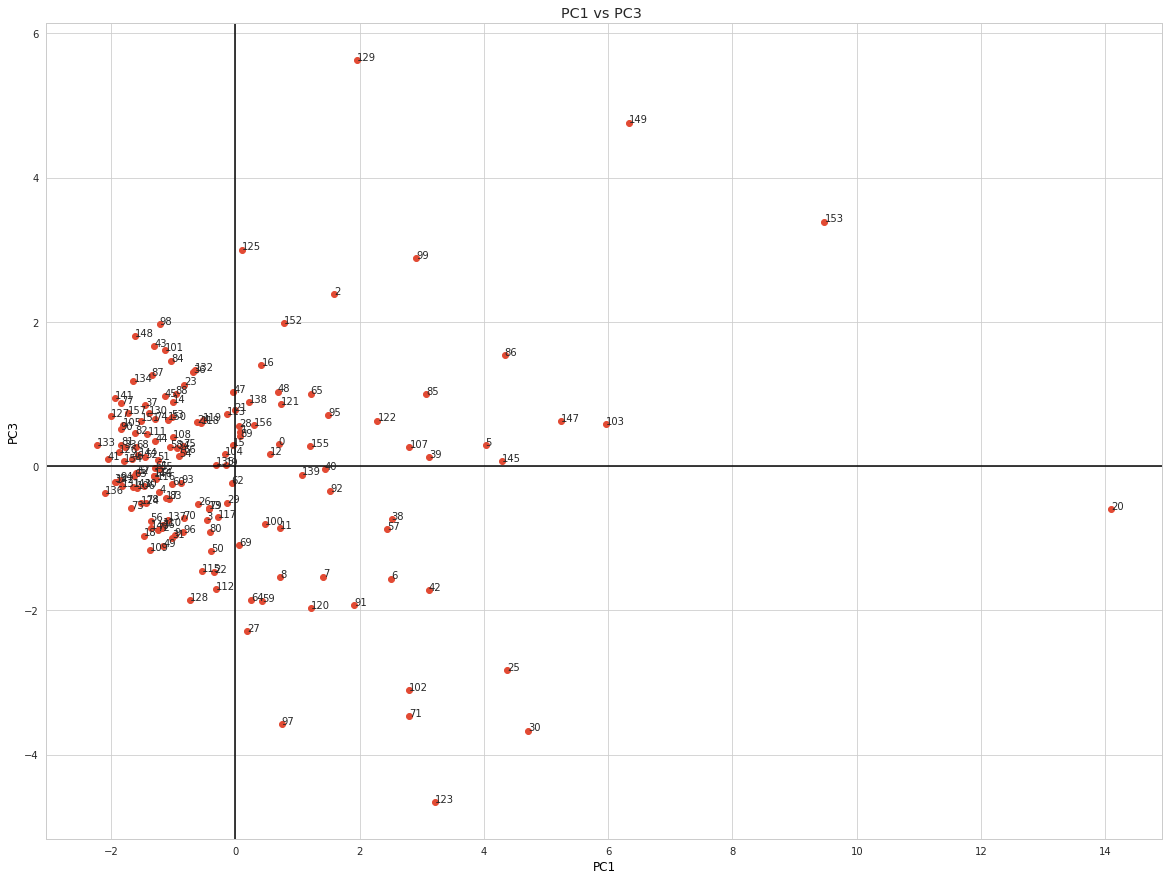

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones['val']=proyecciones.index
print(proyecciones.head())


ax = proyecciones.set_index('PC1')['PC3'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones.PC1, proyecciones.PC3, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC3 ')
plt.xlabel('PC1',color='k')
plt.ylabel('PC3',color='black')

        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC3')

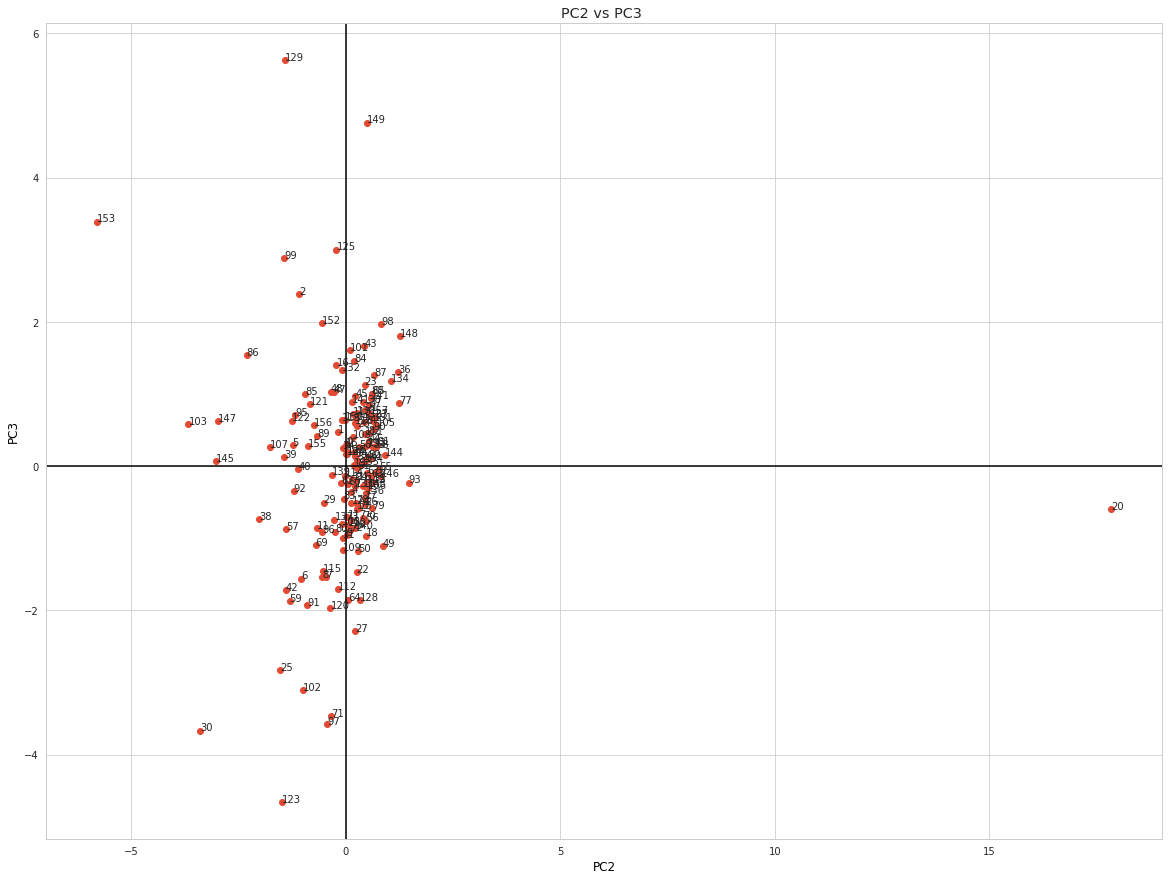

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones['val']=proyecciones.index
print(proyecciones.head())


ax = proyecciones.set_index('PC2')['PC3'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones.PC2, proyecciones.PC3, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC2 vs PC3 ')
plt.xlabel('PC2',color='k')
plt.ylabel('PC3',color='black')

####En las tres gráficas, se pueden observar cuatro diferentes puntos que se encuentran muy dispersos de los demás, por lo que se decide eliminarlos del dataframe, evaluarlos puntualmente a ver si tienen valores atípicos y elaborar un plan de fertilización personalizado.



In [ ]:
#Eliminación de registros con valores atípicos
proyecciones2  = proyecciones.drop([20,129,149,153])


A continuación se evalúa nuevamente el resultado de el ACP en componentes P1, PC2 y PC3 y sus respectivas relaciones sin tener en cuenta los datos que generaban ruido.

        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC2')

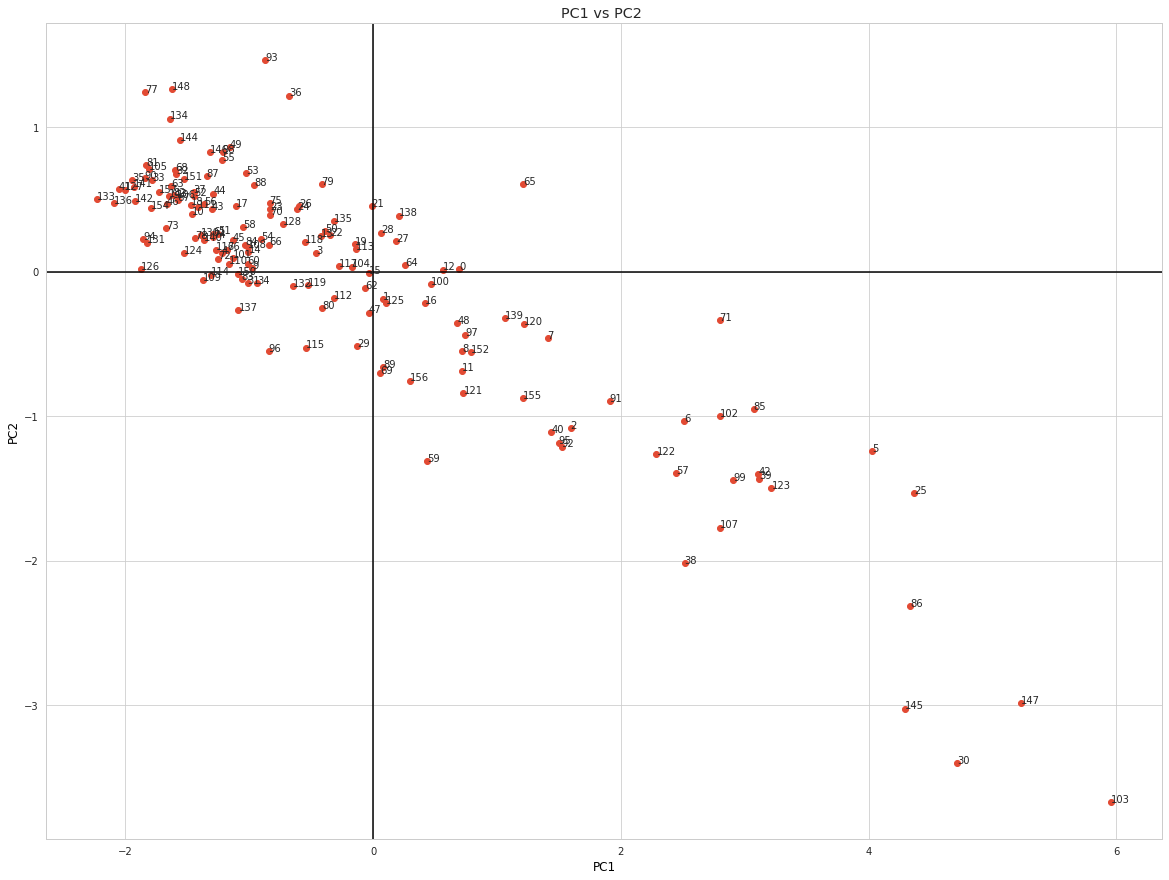

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones2['val']=proyecciones2.index
print(proyecciones.head())


ax = proyecciones2.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones2.PC1, proyecciones2.PC2, proyecciones2.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 ')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC3')

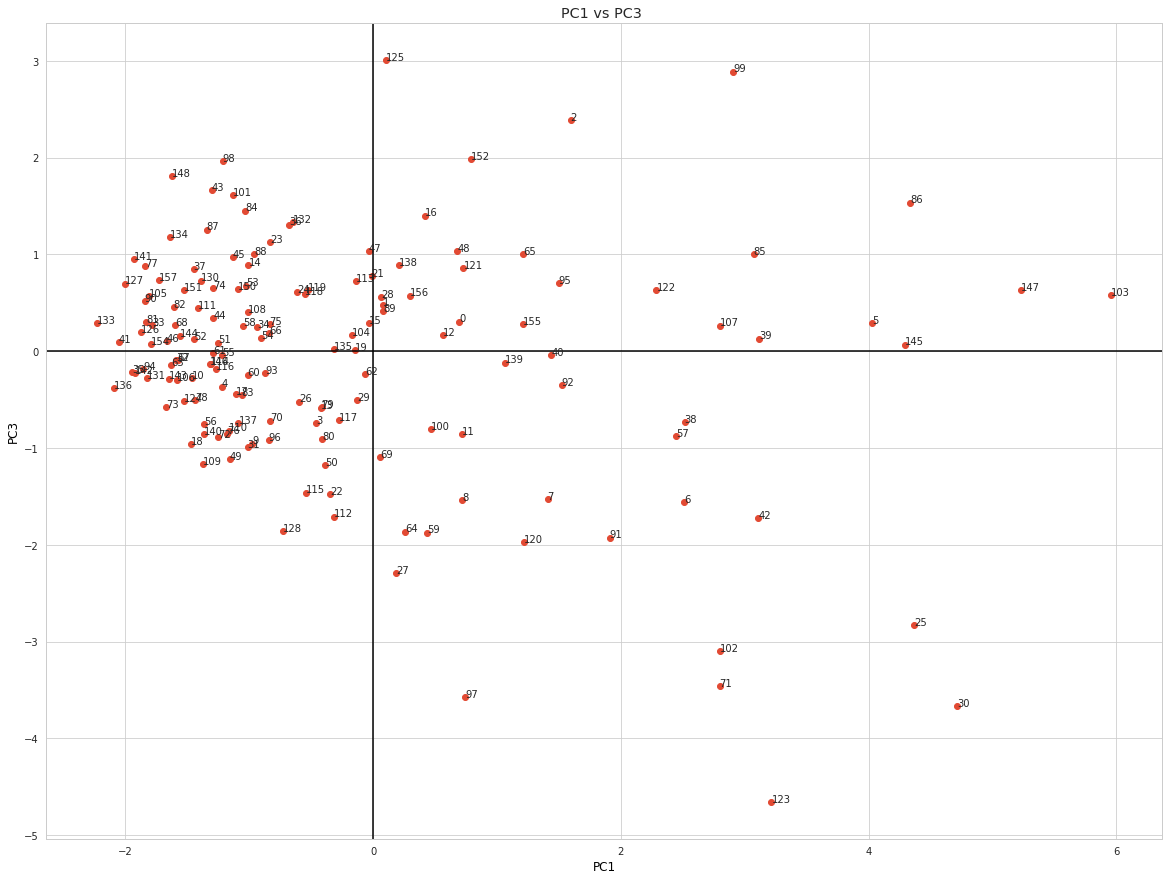

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones2['val']=proyecciones2.index
print(proyecciones.head())


ax = proyecciones2.set_index('PC1')['PC3'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones2.PC1, proyecciones2.PC3, proyecciones2.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC3 ')
plt.xlabel('PC1',color='k')
plt.ylabel('PC3',color='black')

        PC1       PC2       PC3  ...      PC17          PC18  val
0  0.696003  0.019530  0.305570  ... -0.020592 -6.674379e-16    0
1  0.080300 -0.190956  0.474134  ... -0.025819 -6.823388e-16    1
2  1.594866 -1.080992  2.389804  ...  0.009974  1.435033e-15    2
3 -0.462453  0.130496 -0.741333  ...  0.003453  3.047225e-17    3
4 -1.224590  0.128346 -0.364555  ...  0.001732  3.412934e-18    4

[5 rows x 19 columns]


Text(0, 0.5, 'PC3')

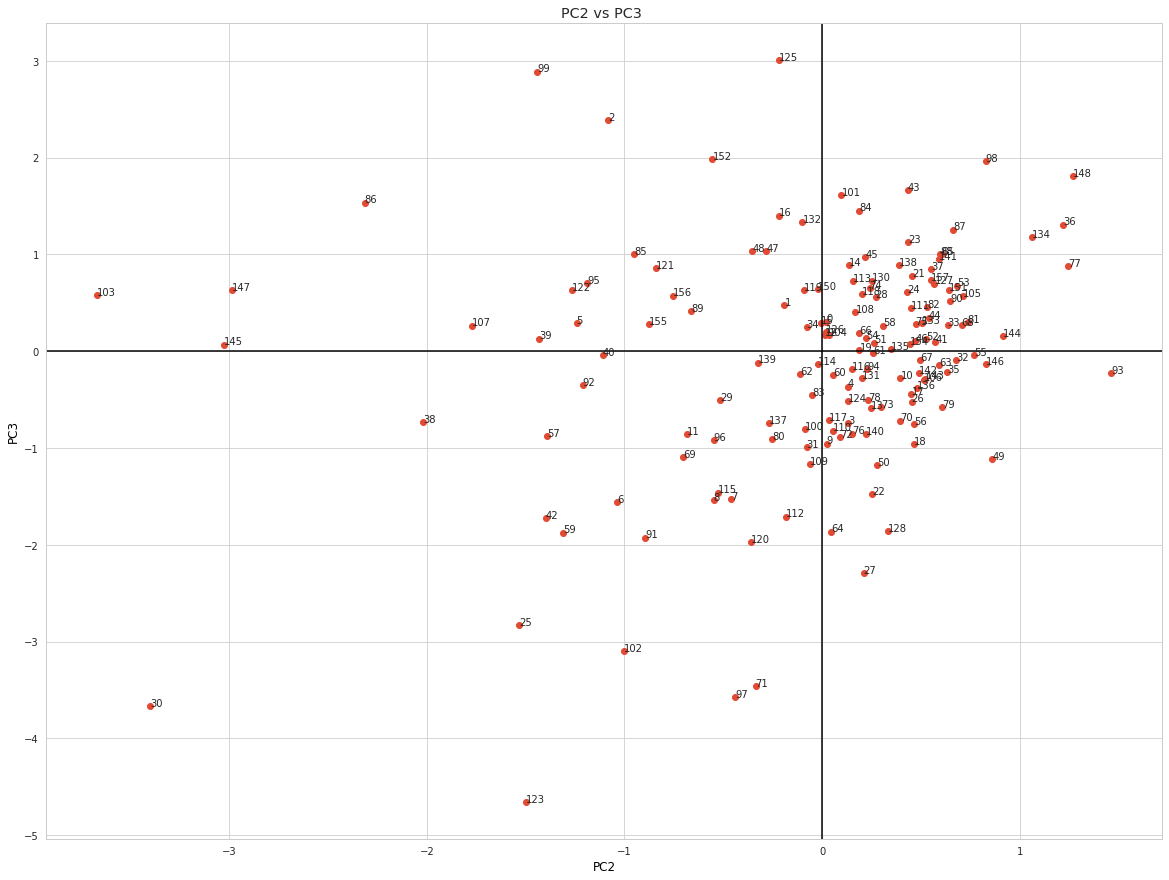

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
proyecciones2['val']=proyecciones2.index
print(proyecciones2.head())


ax = proyecciones2.set_index('PC2')['PC3'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], int(point['val']))

label_point(proyecciones2.PC2, proyecciones2.PC3, proyecciones2.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC2 vs PC3 ')
plt.xlabel('PC2',color='k')
plt.ylabel('PC3',color='black')

En las nuevas relaciones de componentes, se puede observar una mejor relación. A continuación se presenta una imágen donde se hace una agrupación especulativa de acuerdo al volumen de puntos cercanos:

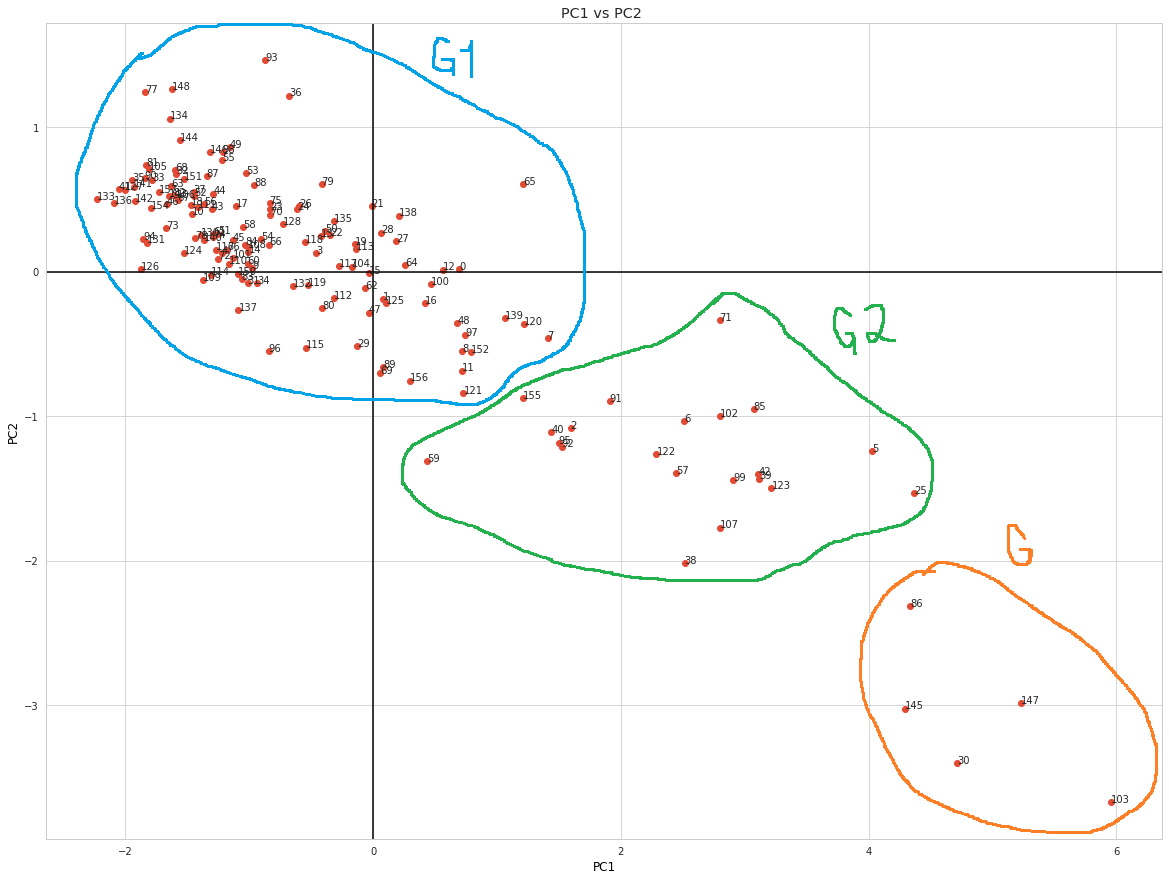

***Después de analizar los posibles grupos generados por el ACP, se toma la decisión de aplicar el algoritmo de clúster jerárquico para obtener unos grupos más definidos y sin tanta variabilidad dentro de los mismos. ***

#Cluster jerárquico en data original

### Agrupación jerárquica

El agrupamiento jerárquico (también llamado análisis de agrupamiento jerárquico o HCA) es un método de análisis de agrupamiento que busca construir una jerarquía de agrupamientos. Las estrategias para la agrupación jerárquica generalmente se dividen en dos tipos:

**Aglomerativo:** se trata de un enfoque "de abajo hacia arriba": cada observación comienza en su propio grupo y los pares de grupos se fusionan a medida que se asciende en la jerarquía.

**Divisivo:** se trata de un enfoque "de arriba hacia abajo": todas las observaciones comienzan en un grupo y las divisiones se realizan de forma recursiva a medida que uno se mueve hacia abajo en la jerarquía.

En general, las fusiones y divisiones se determinan de manera codiciosa. Los resultados de la agrupación jerárquica generalmente se presentan en un dendrograma.

In [ ]:
#Dataset original:
dataSoils.head()

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
0,5.09,0.76,13.40,131.0,30.80,8.26,2.34,0.90,0.45,12.80,608.0,42.7,3.37,0.306,3.529915,2.600000,9.177778,11.777778
1,4.43,1.24,7.12,153.0,32.10,5.96,1.31,0.73,0.39,9.29,1150.0,27.1,4.58,0.370,4.549618,1.794521,8.164384,9.958904
2,5.50,4.41,16.20,94.7,16.90,8.96,3.50,1.17,0.37,14.20,17.9,12.3,0.89,0.430,2.560000,2.991453,7.658120,10.649573
3,5.25,0.42,14.70,51.8,7.68,5.44,1.33,0.59,0.34,9.26,26.7,14.5,0.77,0.306,4.090226,2.254237,9.220339,11.474576
4,4.90,0.58,12.80,20.1,8.07,3.04,0.70,0.54,0.30,6.21,20.7,3.2,2.70,0.230,4.342857,1.296296,5.629630,6.925926


In [ ]:
#Eliminando registros con datos atípicos
dataSoils_cj = dataSoils.drop([20,129,149,153])

#Reestableciendo el index
dataSoils_cj.reset_index(inplace=True, drop=True)

#Copia de dataset que será usada más adelante
dataSoilsCopy = dataSoils_cj.copy()
dataSoils_cj.head()

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
0,5.09,0.76,13.40,131.0,30.80,8.26,2.34,0.90,0.45,12.80,608.0,42.7,3.37,0.306,3.529915,2.600000,9.177778,11.777778
1,4.43,1.24,7.12,153.0,32.10,5.96,1.31,0.73,0.39,9.29,1150.0,27.1,4.58,0.370,4.549618,1.794521,8.164384,9.958904
2,5.50,4.41,16.20,94.7,16.90,8.96,3.50,1.17,0.37,14.20,17.9,12.3,0.89,0.430,2.560000,2.991453,7.658120,10.649573
3,5.25,0.42,14.70,51.8,7.68,5.44,1.33,0.59,0.34,9.26,26.7,14.5,0.77,0.306,4.090226,2.254237,9.220339,11.474576
4,4.90,0.58,12.80,20.1,8.07,3.04,0.70,0.54,0.30,6.21,20.7,3.2,2.70,0.230,4.342857,1.296296,5.629630,6.925926


In [ ]:
#Normalización de los datos

x = dataSoils_cj.values #retorna un numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataSoils_cj = pd.DataFrame(x_scaled, columns=dataSoils_cj.columns)
dataSoils_cj

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
0,0.459770,0.155093,0.355146,0.160434,0.318223,0.246677,0.234694,0.134100,0.005358,0.241660,0.094476,0.488530,0.023778,0.087391,0.322335,0.120004,0.221616,0.247354
1,0.308046,0.266204,0.174114,0.188043,0.332956,0.172123,0.117914,0.101533,0.004321,0.173584,0.179056,0.305946,0.032577,0.107366,0.427327,0.075567,0.194301,0.203766
2,0.554023,1.000000,0.435860,0.114879,0.160698,0.269368,0.366213,0.185824,0.003975,0.268813,0.002389,0.132725,0.005745,0.126092,0.222469,0.141600,0.180655,0.220317
3,0.496552,0.076389,0.392620,0.061041,0.056210,0.155267,0.120181,0.074713,0.003457,0.173002,0.003762,0.158474,0.004872,0.087391,0.380026,0.100929,0.222764,0.240088
4,0.416092,0.113426,0.337850,0.021259,0.060630,0.077472,0.048753,0.065134,0.002765,0.113848,0.002826,0.026217,0.018906,0.063670,0.406038,0.048080,0.125978,0.131084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.597701,0.240741,0.339867,0.030458,0.191410,0.246029,0.253968,0.473180,0.002420,0.270559,0.395132,0.209972,0.016070,0.272784,0.296898,0.028428,0.057420,0.061595
150,0.351724,0.069444,0.175555,0.005547,0.063123,0.058995,0.046485,0.047893,0.000000,0.130140,0.382897,0.037570,0.021960,0.098002,0.332882,0.059931,0.122185,0.132859
151,0.577011,0.138889,0.472759,0.277333,0.071510,0.437925,0.386621,0.375479,0.001210,0.385376,0.090561,0.075492,0.010544,0.119850,0.355068,0.070557,0.150936,0.163036
152,0.641379,0.111111,0.197175,0.065070,0.133386,0.257050,0.269841,0.438697,0.000000,0.262219,0.100872,0.026919,0.020724,0.107366,0.292251,0.035279,0.067114,0.073190


In [ ]:
#Normalización min-max V2
# normalized_df=(dataSoils_cj-dataSoils_cj.min())/(dataSoils_cj.max()-dataSoils_cj.min())
# normalized_df

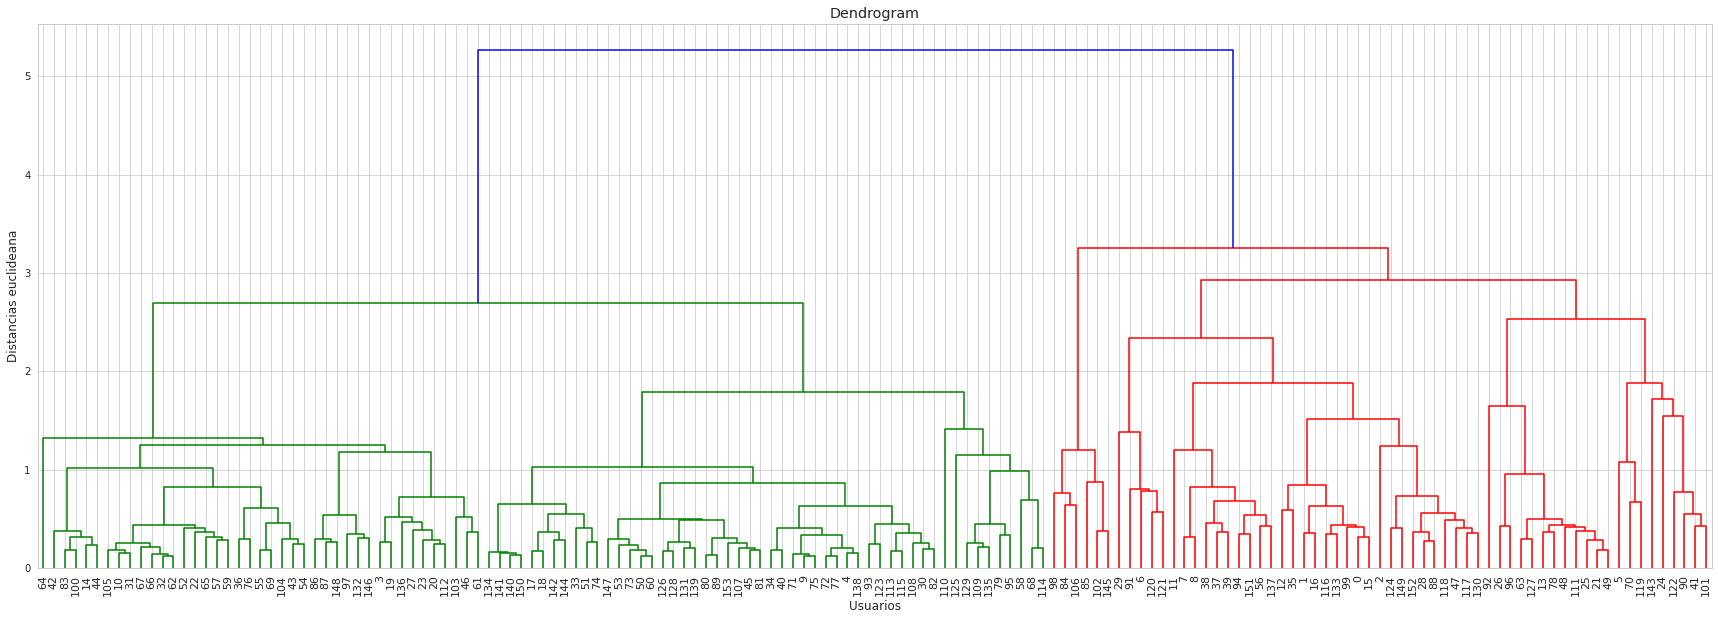

In [ ]:
plt.figure(1, figsize = (30 ,10))
dendrogram = sch.dendrogram(sch.linkage(dataSoils_cj, method  = "ward",metric='euclidean',),
                            orientation='top',# Diferentes formas: right, left, bottom, top
                            ) # Si eligen del metodo de Ward deben usar euclidean

plt.title('Dendrogram')
plt.xlabel('Usuarios')
plt.ylabel('Distancias euclideana')
plt.xticks(fontsize='11')
plt.show()

Se realizaron varias pruebas evaluando la variabilidad de los datos por clúster y se determina que una buena agrupación es de 7 clústeres.

In [ ]:
jc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')
y_jc = jc.fit_predict(dataSoils_cj)
y_jc

array([2, 2, 2, 4, 5, 1, 1, 1, 1, 5, 4, 1, 2, 0, 4, 2, 2, 5, 5, 4, 4, 0,
       4, 4, 3, 0, 0, 4, 2, 1, 5, 4, 4, 5, 5, 2, 4, 1, 1, 1, 5, 3, 4, 4,
       4, 5, 4, 2, 0, 0, 5, 5, 4, 5, 4, 4, 1, 4, 0, 4, 5, 4, 4, 0, 4, 4,
       4, 4, 0, 4, 1, 5, 5, 5, 5, 5, 4, 5, 0, 0, 5, 5, 5, 4, 6, 6, 4, 4,
       2, 5, 3, 1, 0, 5, 1, 0, 0, 4, 6, 2, 4, 3, 6, 4, 4, 4, 6, 5, 5, 0,
       0, 0, 4, 5, 0, 5, 2, 2, 2, 1, 1, 1, 3, 5, 2, 0, 5, 0, 5, 0, 2, 5,
       4, 2, 5, 0, 4, 1, 5, 5, 5, 5, 5, 3, 5, 6, 4, 5, 4, 2, 5, 1, 2, 5])

In [ ]:
y_jc.shape

(154,)

In [ ]:
#Inserción de datos a columna 'cluster'
dataSoils_cj['cluster'] = pd.DataFrame(y_jc)
dataSoils_cj

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K,cluster
0,0.459770,0.155093,0.355146,0.160434,0.318223,0.246677,0.234694,0.134100,0.005358,0.241660,0.094476,0.488530,0.023778,0.087391,0.322335,0.120004,0.221616,0.247354,2
1,0.308046,0.266204,0.174114,0.188043,0.332956,0.172123,0.117914,0.101533,0.004321,0.173584,0.179056,0.305946,0.032577,0.107366,0.427327,0.075567,0.194301,0.203766,2
2,0.554023,1.000000,0.435860,0.114879,0.160698,0.269368,0.366213,0.185824,0.003975,0.268813,0.002389,0.132725,0.005745,0.126092,0.222469,0.141600,0.180655,0.220317,2
3,0.496552,0.076389,0.392620,0.061041,0.056210,0.155267,0.120181,0.074713,0.003457,0.173002,0.003762,0.158474,0.004872,0.087391,0.380026,0.100929,0.222764,0.240088,4
4,0.416092,0.113426,0.337850,0.021259,0.060630,0.077472,0.048753,0.065134,0.002765,0.113848,0.002826,0.026217,0.018906,0.063670,0.406038,0.048080,0.125978,0.131084,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.597701,0.240741,0.339867,0.030458,0.191410,0.246029,0.253968,0.473180,0.002420,0.270559,0.395132,0.209972,0.016070,0.272784,0.296898,0.028428,0.057420,0.061595,2
150,0.351724,0.069444,0.175555,0.005547,0.063123,0.058995,0.046485,0.047893,0.000000,0.130140,0.382897,0.037570,0.021960,0.098002,0.332882,0.059931,0.122185,0.132859,5
151,0.577011,0.138889,0.472759,0.277333,0.071510,0.437925,0.386621,0.375479,0.001210,0.385376,0.090561,0.075492,0.010544,0.119850,0.355068,0.070557,0.150936,0.163036,1
152,0.641379,0.111111,0.197175,0.065070,0.133386,0.257050,0.269841,0.438697,0.000000,0.262219,0.100872,0.026919,0.020724,0.107366,0.292251,0.035279,0.067114,0.073190,2


In [ ]:
trace1 = go.Scatter3d(
    x= dataSoils_cj['Materia Organica (g/100g)'],
    y= dataSoils_cj['Ph'],
    z= dataSoils_cj['Capacidad Intercambio Cationico (Cmol/kg)'],
    mode='markers',
     marker=dict(
        color = dataSoils_cj['cluster'], 
        size= 10,
        line=dict(
            color= dataSoils_cj['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)

data = [trace1]
layout = go.Layout(
    title= 'Clusters usando tecnica Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Materia Organica (g/100g)'),
            yaxis = dict(title  = 'pH'),
            zaxis = dict(title  = 'Capacidad Intercambio Cationico (Cmol/kg)')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

En el anterior gráfico 3D se observan las agrupaciones de clústeres con respecto a tres variables fundamentales en el suelo. El grupo: 
- **Naranja** muestra las fincas que tienen alta materia orgánica, ph medio-bajo y CIC bajo.
- **Amarillo oscuro** representa a los que tienen baja materia orgánica, ph medio y CIC baja.
- **Amarillo claro** muestra a los suelos que tienen materia orgánica media, ph alto y alta CIC.
- **Azul** representa los que tienen materia orgánica baja-media, ph medio y CIC baja-media.
- **Rosado** muestra el grupo con materia orgánica baja-media, ph alto y CIC media.
- **Morado claro** representa a los que tienen materia orgánica baja-media , ph medio y CIC baja.
- **Morado oscuro** muestra los que tienen materia orgánica baja-media, ph medio-alto y CIC variable (alta-media-baja)

###A continuación se presentan las relaciones entre otras variables en plano 2D. 

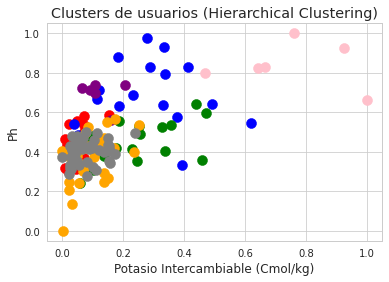

In [ ]:
X = dataSoils_cj.iloc[:, [7,0]].values
plt.scatter(X[y_jc==0, 0], X[y_jc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_jc==1, 0], X[y_jc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_jc==2, 0], X[y_jc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_jc==3, 0], X[y_jc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_jc==4, 0], X[y_jc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_jc==5, 0], X[y_jc==5, 1], s=100, c='gray', label ='Cluster 6')
plt.scatter(X[y_jc==6, 0], X[y_jc==6, 1], s=100, c='pink', label ='Cluster 7')
# plt.scatter(X[y_jc==7, 0], X[y_jc==7, 1], s=100, c='black', label ='Cluster 8')
# plt.scatter(X[y_jc==8, 0], X[y_jc==8, 1], s=100, c='pink', label ='Cluster 9')
# plt.scatter(X[y_jc==9, 0], X[y_jc==9, 1], s=100, c='black', label ='Cluster 10')

plt.title('Clusters de usuarios (Hierarchical Clustering)')
plt.xlabel('Potasio Intercambiable (Cmol/kg)') #Ph
plt.ylabel('Ph') #Potasio Intercambiable (Cmol/kg)
plt.show()

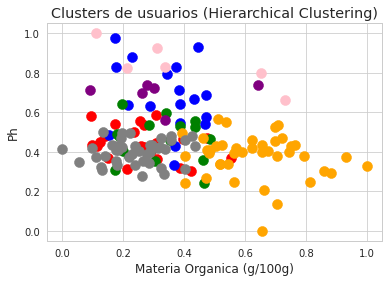

In [ ]:
X = dataSoils_cj.iloc[:, [2,0]].values
plt.scatter(X[y_jc==0, 0], X[y_jc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_jc==1, 0], X[y_jc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_jc==2, 0], X[y_jc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_jc==3, 0], X[y_jc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_jc==4, 0], X[y_jc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_jc==5, 0], X[y_jc==5, 1], s=100, c='gray', label ='Cluster 6')
plt.scatter(X[y_jc==6, 0], X[y_jc==6, 1], s=100, c='pink', label ='Cluster 7')
# plt.scatter(X[y_jc==7, 0], X[y_jc==7, 1], s=100, c='black', label ='Cluster 8')
# plt.scatter(X[y_jc==8, 0], X[y_jc==8, 1], s=100, c='pink', label ='Cluster 9')
# plt.scatter(X[y_jc==9, 0], X[y_jc==9, 1], s=100, c='black', label ='Cluster 10')

plt.title('Clusters de usuarios (Hierarchical Clustering)')
plt.xlabel('Materia Organica (g/100g)') #Materia Organica (g/100g)
plt.ylabel('Ph') #Ph
plt.show()

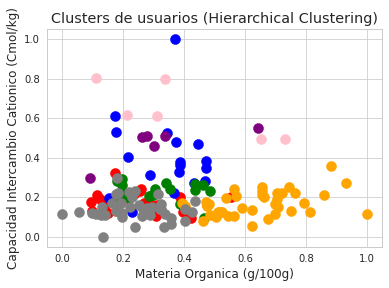

In [ ]:
X = dataSoils_cj.iloc[:, [2,9]].values
plt.scatter(X[y_jc==0, 0], X[y_jc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_jc==1, 0], X[y_jc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_jc==2, 0], X[y_jc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_jc==3, 0], X[y_jc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_jc==4, 0], X[y_jc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_jc==5, 0], X[y_jc==5, 1], s=100, c='gray', label ='Cluster 6')
plt.scatter(X[y_jc==6, 0], X[y_jc==6, 1], s=100, c='pink', label ='Cluster 7')
# plt.scatter(X[y_jc==7, 0], X[y_jc==7, 1], s=100, c='black', label ='Cluster 8')
# plt.scatter(X[y_jc==8, 0], X[y_jc==8, 1], s=100, c='pink', label ='Cluster 9')
# plt.scatter(X[y_jc==9, 0], X[y_jc==9, 1], s=100, c='black', label ='Cluster 10')

plt.title('Clusters de usuarios (Hierarchical Clustering)')
plt.xlabel('Materia Organica (g/100g)') #Materia Organica (g/100g)
plt.ylabel('Capacidad Intercambio Cationico (Cmol/kg)') #Capacidad Intercambio Cationico (Cmol/kg)
plt.show()

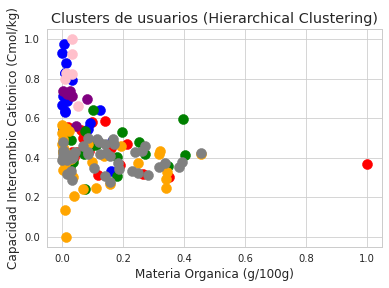

In [ ]:
X = dataSoils_cj.iloc[:, [10,0]].values
plt.scatter(X[y_jc==0, 0], X[y_jc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_jc==1, 0], X[y_jc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_jc==2, 0], X[y_jc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_jc==3, 0], X[y_jc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_jc==4, 0], X[y_jc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_jc==5, 0], X[y_jc==5, 1], s=100, c='gray', label ='Cluster 6')
plt.scatter(X[y_jc==6, 0], X[y_jc==6, 1], s=100, c='pink', label ='Cluster 7')
# plt.scatter(X[y_jc==7, 0], X[y_jc==7, 1], s=100, c='black', label ='Cluster 8')
# plt.scatter(X[y_jc==8, 0], X[y_jc==8, 1], s=100, c='pink', label ='Cluster 9')
# plt.scatter(X[y_jc==9, 0], X[y_jc==9, 1], s=100, c='black', label ='Cluster 10')

plt.title('Clusters de usuarios (Hierarchical Clustering)')
plt.xlabel('Materia Organica (g/100g)') #Materia Organica (g/100g)
plt.ylabel('Capacidad Intercambio Cationico (Cmol/kg)') #Capacidad Intercambio Cationico (Cmol/kg)
plt.show()

In [ ]:
#Agrupación y media en datos normalizados
dataSoils_cj.groupby('cluster').mean() 

,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
cluster,,,,,,,,,,,,,,,,,,
0,0.443678,0.066919,0.266005,0.132930,0.072658,0.143686,0.151907,0.058029,0.000856,0.175815,0.165672,0.093255,0.084622,0.080425,0.455883,0.180456,0.287177,0.331899
1,0.673436,0.148405,0.341325,0.327574,0.105168,0.421340,0.284140,0.268455,0.002223,0.402336,0.041083,0.368043,0.017783,0.142010,0.495674,0.089442,0.263627,0.271428
2,0.451664,0.225755,0.310221,0.129240,0.157185,0.199266,0.197935,0.235289,0.001736,0.225185,0.150199,0.302773,0.025466,0.114364,0.322559,0.067976,0.130605,0.143840
3,0.695785,0.255787,0.319064,0.179361,0.264544,0.622420,0.393802,0.122989,0.168404,0.472621,0.033290,0.147452,0.012871,0.147368,0.565334,0.224834,0.650518,0.674207
4,0.378413,0.119298,0.630687,0.050902,0.087259,0.080468,0.069736,0.086861,0.001749,0.168419,0.084728,0.084803,0.007846,0.110076,0.334505,0.054047,0.109847,0.119334
5,0.400493,0.056823,0.241328,0.034882,0.066153,0.064236,0.062113,0.083571,0.001097,0.140327,0.140708,0.045543,0.017535,0.070671,0.302331,0.056512,0.102444,0.113823
6,0.839080,0.228395,0.392572,0.318278,0.165250,0.715397,0.684618,0.743934,0.002564,0.636960,0.027763,0.173611,0.017185,0.300354,0.334057,0.065716,0.133296,0.145251


]A continuación se realiza la agrupación de los datos en su respectivo clúster y se obtiene la media. Posteriormente se realizan gráficos para analizar la variación de los datos por cluster/variable, media, datos atípicos y máximos y mínimos, usando boxplot.

In [ ]:
#Agrupación y media en datos originales/clúster/variable

dataSoilsCopy['cluster'] = pd.DataFrame(y_jc) #Inserción de columna 'cluster' a datos originales

dataSoilsCopy.groupby('cluster').mean()#Media/variable


,Ph,Conductividad electrica (ds/m),Materia Organica (g/100g),Fosforo disponible (mg/g),Azufre disponible (mg/kg),Calcio Intercambiable (Cmol/Kg),Magnesio Irtercambiable (Cmol/kg),Potasio Intercambiable (Cmol/kg),Sodio Intercambiable (Cmol/Kg,Capacidad Intercambio Cationico (Cmol/kg),Hierro Disponible (mg/Kg),Zinc Disponible (mg/Kg),Cobre Dispoble (mg/Kg),Boro disponible (mg/kg),Ca/Mg,Mg/K,Ca/K,(Ca+Mg)/K
cluster,,,,,,,,,,,,,,,,,,
0,5.020000,0.379091,10.307727,109.083636,9.131364,5.082727,1.609818,0.502909,0.189545,9.405000,1064.228182,8.927727,11.737273,0.283682,4.826958,3.695761,11.610050,15.305810
1,6.019444,0.731111,12.920556,264.183889,12.000000,13.648333,2.776111,1.601333,0.268611,21.084444,265.856667,32.405556,2.545556,0.481000,5.213419,2.046023,10.736369,12.782392
2,5.054737,1.065263,11.841579,106.143684,16.590000,6.797368,2.015789,1.428211,0.240474,11.950526,965.076842,26.828947,3.602105,0.392421,3.532095,1.656937,5.801297,7.458234
3,6.116667,1.195000,12.148333,146.081667,26.063333,19.851667,3.743333,0.842000,9.883833,24.708333,215.913333,13.558333,1.870000,0.498167,5.889972,4.500181,25.089879,29.590060
4,4.736098,0.605366,22.958537,43.720488,10.419756,3.132439,0.885073,0.653415,0.241195,9.023659,545.533171,8.205610,1.179024,0.378683,3.648114,1.404440,5.031174,6.435613
5,4.832143,0.335476,9.451667,30.955714,8.557381,2.631667,0.817833,0.636238,0.203476,7.575238,904.260476,4.851190,2.511429,0.252429,3.335639,1.449130,4.756510,6.205640
6,6.740000,1.076667,14.698333,256.776667,17.301667,22.720000,6.308333,4.083333,0.288333,33.181667,180.495000,15.793333,2.463333,0.988333,3.643762,1.615970,5.901121,7.517090


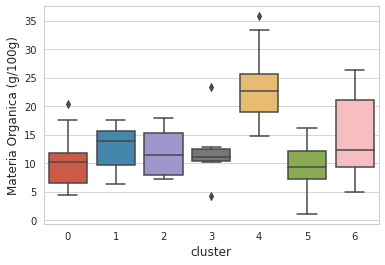

In [ ]:
# Boxplot para evaluar variables/grupo

plt.figure(figsize=(6, 4))
sns.boxplot(y='Materia Organica (g/100g)',x='cluster',data=dataSoilsCopy)
plt.show()

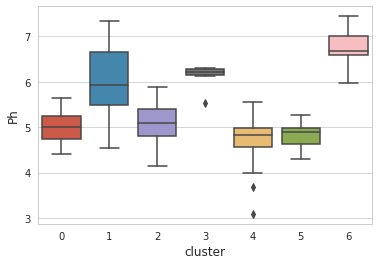

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Ph',x='cluster',data=dataSoilsCopy)
plt.show()

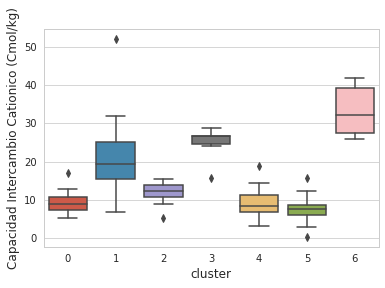

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Capacidad Intercambio Cationico (Cmol/kg)',x='cluster',data=dataSoilsCopy)
plt.show()

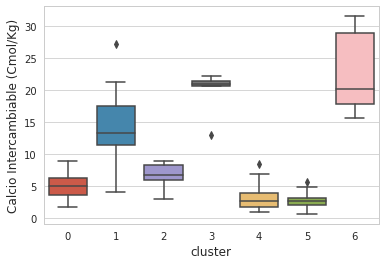

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Calcio Intercambiable (Cmol/Kg)',x='cluster',data=dataSoilsCopy)
plt.show()

##Conclusiones
- El algoritmo de ACP como método de reducción de dimensionalidad, generó un indicio para estimar cuántos grupos se podían obtener.
- El ACP permitió identificar los registros con datos atípicos, y permite tomar decisiones, como en este caso, tomándolos como datos especiales para realizar un plan de fertilización personalizado.

- El algoritmo de clúster jerárquico permitió identificar patrones en diferentes variables siendo agrupados en 7 clústeres. Los planes de fertilización se pueden generalizar en 7 grupos y no de forma individual, optimizando el tiempo invertido en comparación con un plan de fertilización por finca.

- Los algoritmos de aprendizaje no supervisado permiten realizar análisis de datos con múltiples variables sin clasificación.
